In [5]:
#Criando um recomendador de filmes usando K-means
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

filmes = pd.read_csv("movies.csv")
#Observando os 5 primeiros elementos do data frame
filmes.head()

#Mudando os nomes das colunas para português
filmes.columns = ['filme_id','titulo','generos']
filmes.head()

#Agora, para trabalhar melhor com os meu dados, vou transformar os gêneros em variáveis dummyes
generos = filmes.generos.str.get_dummies()
generos.head()

#Depois de criar as variáveis dummies, vou adicionar um peso para essas variáveis com o fim de, quando for fazer indicação do filme
#para uma pessoa, a recomendação ser mais acertiva. Por exemplo: Supondo que uma pessoa assistiu vários filmes de animação, mas
#poucos filmes que não são de animação. Dessa forma, o gênero "animação" terá um peso maior que os que não possuem esse mesmo gênero.
#Sendo assim, haveria uma maior probabilidade de um filme com o gênero de "animação" ser indicado ao invés de um que não possuí, devido a tendência da pessoa de ver mais filmes com esse gênero.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
generos_escalonados = scaler.fit_transform(generos)
print(generos_escalonados)

scaler = StandardScaler()
generos_escalonados = scaler.fit_transform(generos)

generos_escalonados

#Por fim, concateno esses dois dataframes
dados_dos_filmes = pd.concat([filmes,generos],axis = 1)
dados_dos_filmes.head()

#Criando meu modelo
from sklearn.cluster import KMeans
modelo = KMeans(n_clusters = 3 )
modelo.fit(generos_escalonados)

c:\users\mathe\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\mathe\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\mathe\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\mathe\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


[[-0.05917995 -0.48060698  2.59101927 ... -0.49125897 -0.20201972
  -0.13206534]
 [-0.05917995 -0.48060698  2.59101927 ... -0.49125897 -0.20201972
  -0.13206534]
 [-0.05917995 -0.48060698 -0.3859485  ... -0.49125897 -0.20201972
  -0.13206534]
 ...
 [-0.05917995 -0.48060698 -0.3859485  ... -0.49125897 -0.20201972
  -0.13206534]
 [-0.05917995  2.0807022  -0.3859485  ... -0.49125897 -0.20201972
  -0.13206534]
 [-0.05917995 -0.48060698 -0.3859485  ... -0.49125897 -0.20201972
  -0.13206534]]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x24D23BD0>,
      dtype=object)

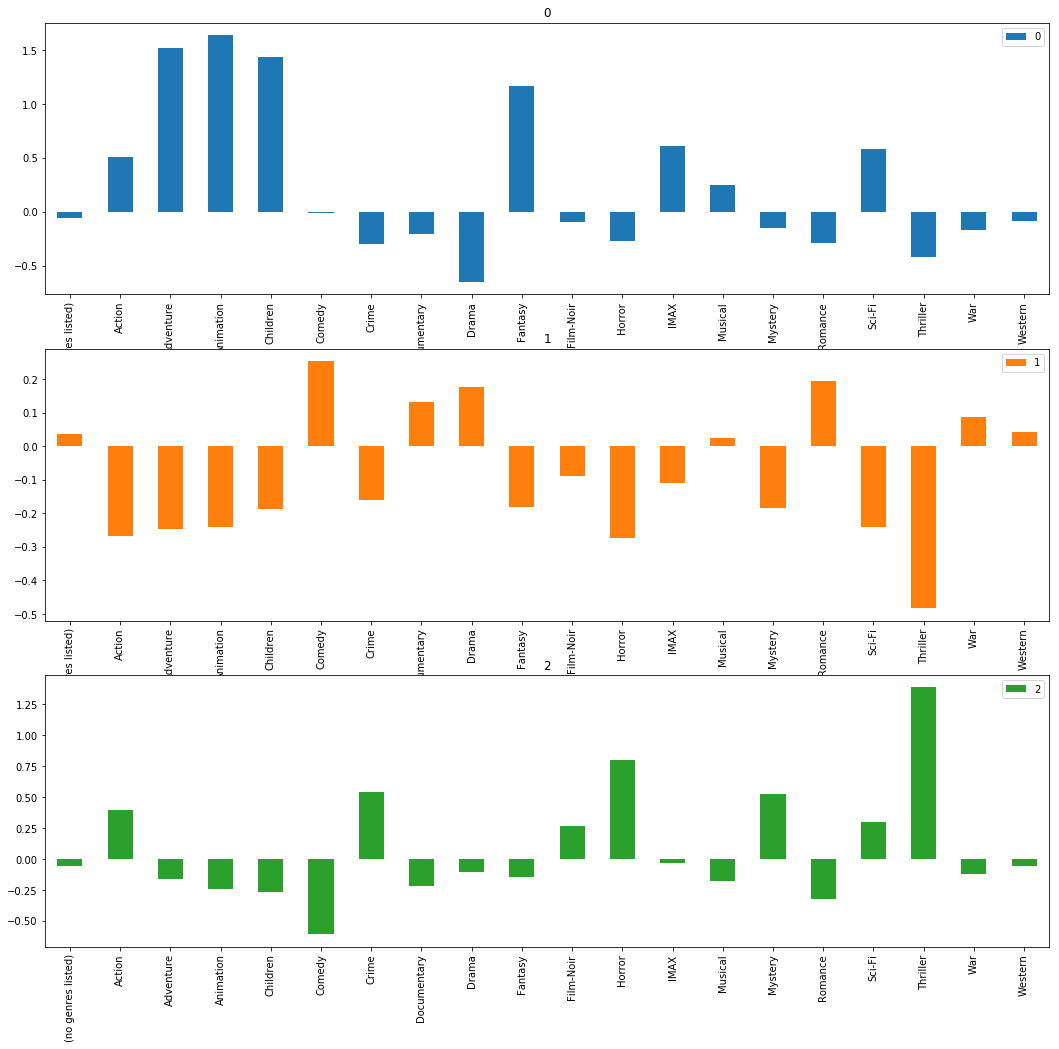

In [25]:
#Agora, vou plotar os meus grupos, ver como eles estão divididos, e os centróides.
#Inicialmente, vou transformar os dados dos centróides em um data frame
grupos = pd.DataFrame(modelo.cluster_centers_,columns = generos.columns)
grupos.transpose().plot.bar(subplots = True,figsize = (18,17),sharex = False)
#Para plotar os 3 grupos, fiz uma transposição da matriz, já que esse plot, sem a transposição, seria feito sobre as 20 colunas criadas
#através da transformação dos gêneros em dummies. Portanto, os gráficos ficariam mais difíceis de interpretar

#Através da interpretação desse gráfico, posso ver que meu grupo 0, é o grupo das animações
#Já o grupo 1 seria mais um grupo de filmes de ação e terror
#Por fim, o grupo 3 seriam os filmes de romance

In [4]:
#Agora, para ver se esses grupos tem algum sentido, vou imprimir alguns filmes que pertencem ao mesmo grupo
filtro = modelo.labels_ == 0 #Vou fazer isso para o grupo 0
dados_dos_filmes[filtro].sample(10)
#Vejo que sim, os filmes tem gêneros semelhantes

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7907,95170,Beauty and the Beast: The Enchanted Christmas ...,Animation|Children|Fantasy|Musical,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2503,3345,"Charlie, the Lonesome Cougar (1967)",Adventure|Children,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7264,74553,"Secret of Kells, The (2009)",Animation|Fantasy,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6005,37729,Corpse Bride (2005),Animation|Comedy|Fantasy|Musical|Romance,0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
6410,50999,"Ugly Duckling and Me!, The (2006)",Animation|Comedy,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5847,32554,Memories (Memorîzu) (1995),Animation|Fantasy|Sci-Fi|Thriller,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8725,126577,"Daddy, I'm A Zombie (2012)",Animation|Comedy|Fantasy,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8339,107953,Dragon Ball Z: Battle of Gods (2013),Action|Animation|Fantasy|IMAX,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
671,885,Bogus (1996),Children|Drama|Fantasy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9665,182297,Porky in Wackyland (1938),Animation|Comedy|Fantasy,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#Para conseguir visualizar melhor os grupos, e reduzir a dimensionalidade (reduzir para 2 dimensões)
sns.set(rc={'figure.figsize': (13,13)})
from sklearn.manifold import TSNE
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalonados)

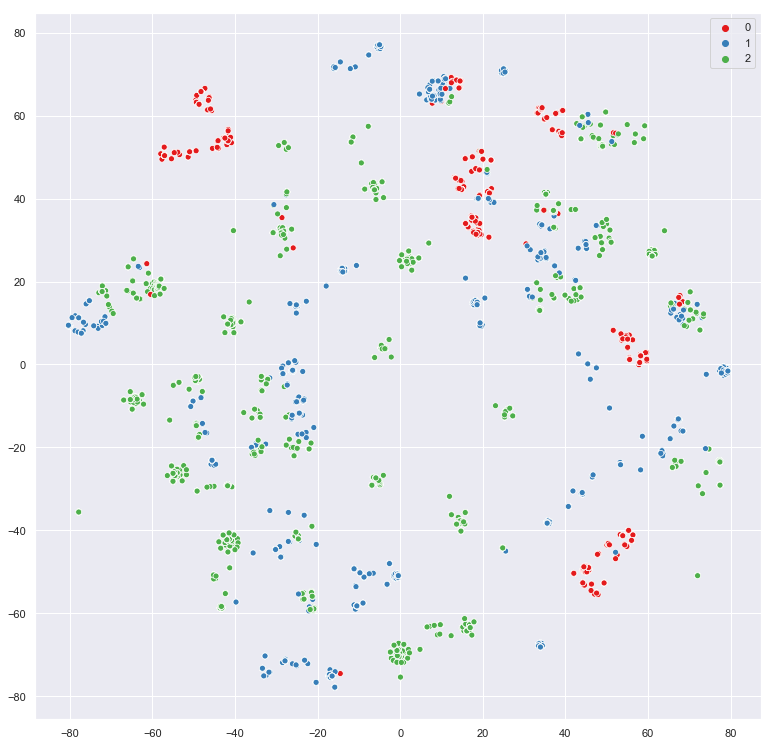

In [19]:
sns.scatterplot(x = visualizacao[:,0], y =visualizacao[:,1], hue = modelo.labels_, palette = sns.color_palette("Set1",3))
#Através desse gráfico, parece que os gráficos estão próximos. Entretando, devido a redução de 20 dimensões (gêneros dos filmes) para 2 (x,y)
#os pontos da mesma cor, estão, na verdade, próximos entre si. 
#Também quando trabalhos com a redução de dimensão, acabamos por perder informação, por isso, através da análise visual do gráfico, os pontos parecem que estão agrupados de forma errada.

In [24]:
#Agora, de fato visualizando os centróides:
from sklearn.datasets import make_blobs

dados,_ = make_blobs(n_samples = 1000, n_features = 2, random_state = 7)

#Criando um data frame com a dimensionalidade reduzia
dados = pd.DataFrame(dados, columns =['coluna1','coluna2'])
dados.head()

,coluna1,coluna2
0,9.829632,0.763094
1,-9.723548,4.100788
2,10.403457,1.761671
3,-2.253417,4.660486
4,13.059859,-0.004112


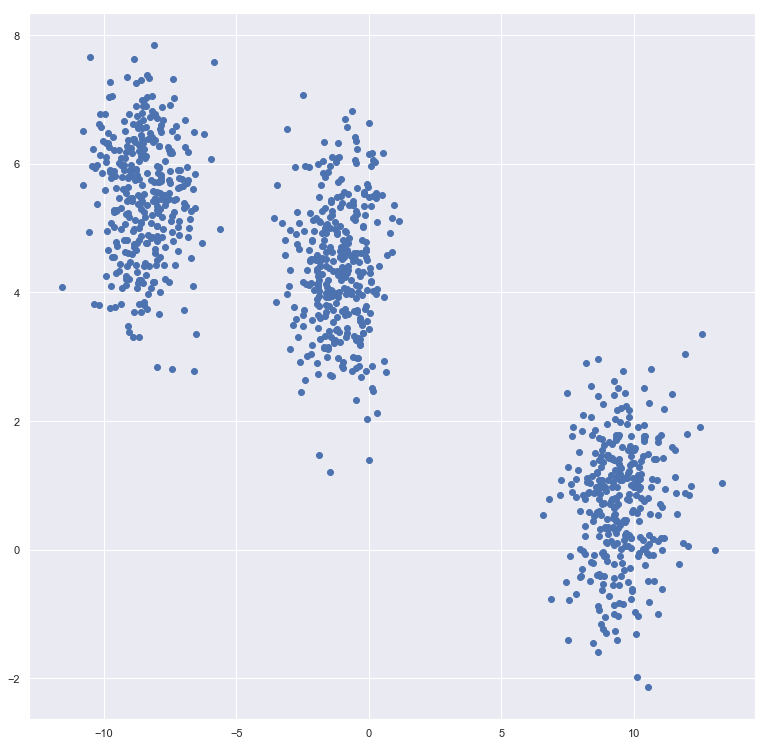

In [26]:
#Plotando esses dados
plt.scatter(x = dados.coluna1, y = dados.coluna2)

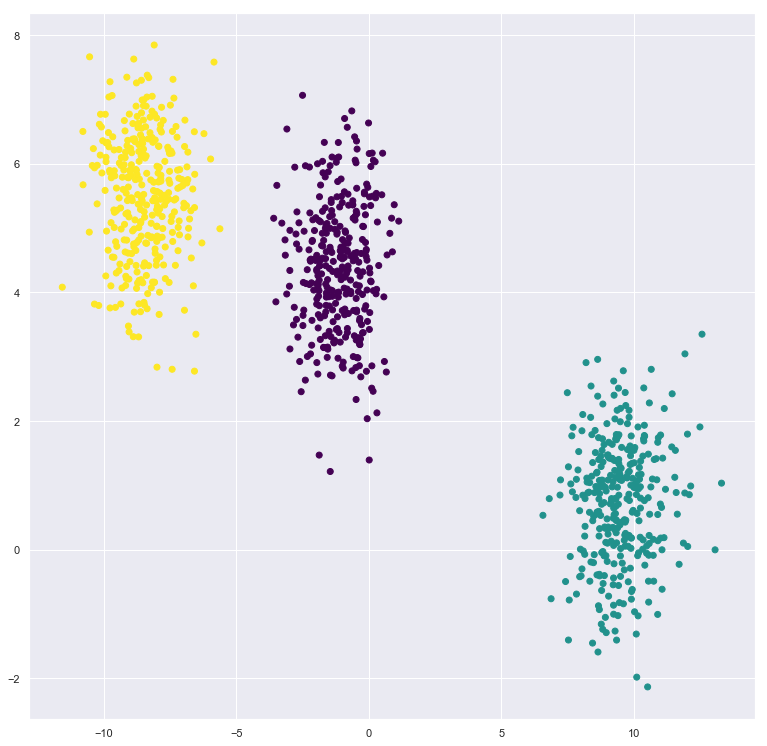

In [30]:
#Usando o Kmeans para criar um grupo com 3 modelos
kmeans = KMeans(n_clusters=3)
groups = kmeans.fit_predict(dados)
plt.scatter(x = dados.coluna1, y = dados.coluna2, c =grupos, cmap = 'viridis')

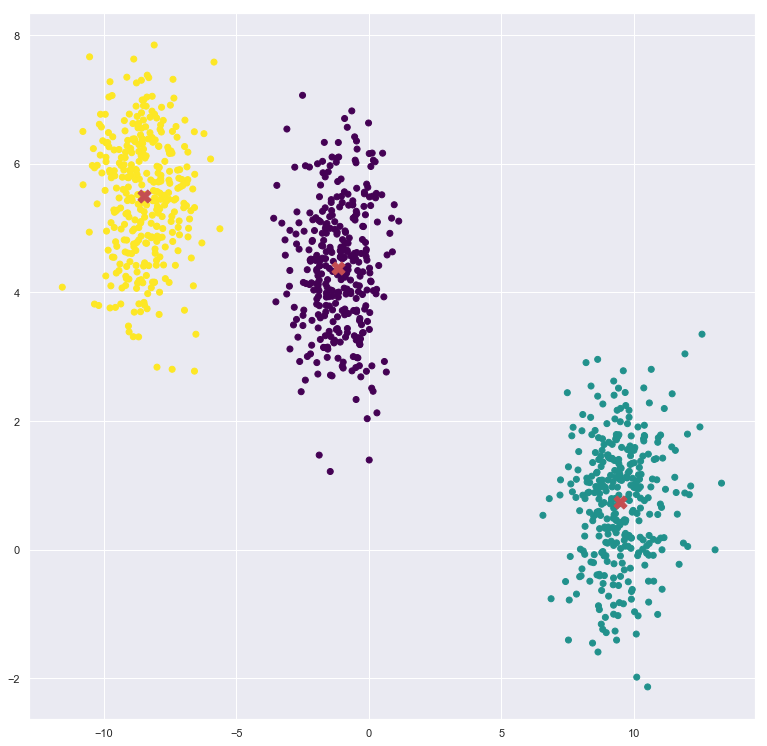

In [39]:
centroides = kmeans.cluster_centers_ #os centróides estão em duas dimensões x e y, logo, preciso dessas dimensões para plotar os centróides em um plano cartesiano
plt.scatter(x = dados.coluna1, y = dados.coluna2, c =grupos, cmap = 'viridis')
plt.scatter(centroides[:,0],centroides[:,1], marker = 'X',color = 'r', s = 169,zorder = 8)
#Dessa forma, consigo visualizar os centróides de cada grupo

In [8]:
#Agora, para saber o melhor número de clusters, vou usar o "Elbow method"
#Entrada: quantidade de clusters (grupos) e os gêneros que serão utilizados para treinar meu modelo
#Saída: lista com a quantidade de clusters e o erro gerado para essa quantidade de clusters.
#Pré condição: n_grupos tem que ser maior que zero  e gêneros não podem ser atributos nominais (tem que serem dummies) e escalonados
def erro_kmeans(n_grupos, generos):
    modelo = KMeans(n_clusters = n_grupos)
    modelo.fit(generos)
    return [n_grupos,modelo.inertia_] #retorno a quantidade de clustes e o erro, de acordo com a quantidade de clusters

erros = [erro_kmeans(n_grupos,generos_escalonados) for n_grupos in range(1,41)]
erros

[[1, 194840.0],
 [2, 179571.5769982981],
 [3, 166294.7440461071],
 [4, 157241.8102622323],
 [5, 148545.3457867666],
 [6, 137930.2625156554],
 [7, 128074.1166482714],
 [8, 118057.83773390362],
 [9, 110576.76212293467],
 [10, 102731.03245941998],
 [11, 95207.4036453302],
 [12, 87758.80561824344],
 [13, 80843.95011343314],
 [14, 75122.91885291398],
 [15, 69206.24070970398],
 [16, 63761.771186041726],
 [17, 61191.36952115143],
 [18, 59212.2659291788],
 [19, 55883.495059069595],
 [20, 55069.44873255618],
 [21, 53784.51647863044],
 [22, 51897.92724057096],
 [23, 51104.27109011193],
 [24, 49966.188137330384],
 [25, 48319.81452828649],
 [26, 46498.64133470775],
 [27, 46152.68748305516],
 [28, 44957.438178331206],
 [29, 43398.97097354956],
 [30, 43039.71726946661],
 [31, 41454.998607440735],
 [32, 40987.279069769276],
 [33, 39744.93864544629],
 [34, 39964.85422366394],
 [35, 38318.621831098935],
 [36, 38012.38283441014],
 [37, 37066.4029818876],
 [38, 36493.53838488089],
 [39, 35907.68189596551

In [11]:
#Criando um dataframe com esses dados
df_erros = pd.DataFrame(erros, columns = ['grupo','inertia'])
df_erros

,grupo,inertia
0,1,194840.000000
1,2,179571.576998
2,3,166294.744046
3,4,157241.810262
4,5,148545.345787
5,6,137930.262516
6,7,128074.116648
7,8,118057.837734
8,9,110576.762123
9,10,102731.032459


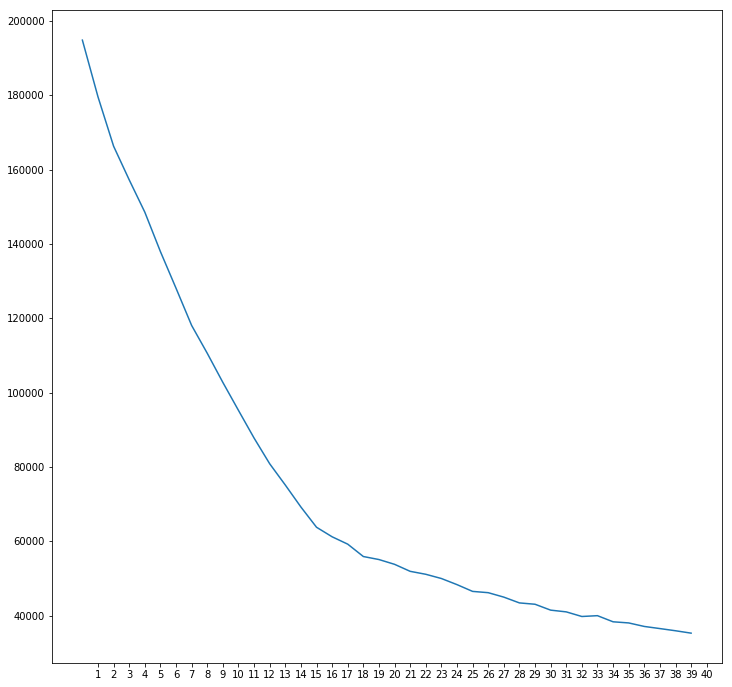

In [17]:
#Por fim, plotando os erros
df_erros.inertia.plot(figsize = (12,12), xticks = df_erros.grupo)
#através da análise do gráfico e do data frame, posso dizer que os valores 17,18 e 19 seriam boas quantidades de grupos para o meu modelo


In [20]:
#Agora, vou treinar novamente meu modelo
modelo = KMeans(n_clusters = 17)
modelo.fit(generos_escalonados)

#Verificando a distribuição dos meus gêneros, depois do treinamento do meu modelo
filtro = modelo.labels_ == 2
dados_dos_filmes[filtro].sample(10)
#Vejo que esse grupo, é o grupo do gênero musical, pois todos os meus dados desse grupo, possuem esse gênero. 

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7684,89386,Pearl Jam Twenty (2011),Documentary|Musical,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8455,112316,Jersey Boys (2014),Drama|Musical,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7240,73854,"Rudolph, the Red-Nosed Reindeer (1964)",Adventure|Animation|Children|Fantasy|Musical,0,0,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6005,37729,Corpse Bride (2005),Animation|Comedy|Fantasy|Musical|Romance,0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
618,783,"Hunchback of Notre Dame, The (1996)",Animation|Children|Drama|Musical|Romance,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
3442,4690,"Cotton Club, The (1984)",Crime|Musical,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
955,1256,Duck Soup (1933),Comedy|Musical|War,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
789,1032,Alice in Wonderland (1951),Adventure|Animation|Children|Fantasy|Musical,0,0,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4810,7165,"Company, The (2003)",Drama|Musical,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
786,1029,Dumbo (1941),Animation|Children|Drama|Musical,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x21B6D370>,
      dtype=object)

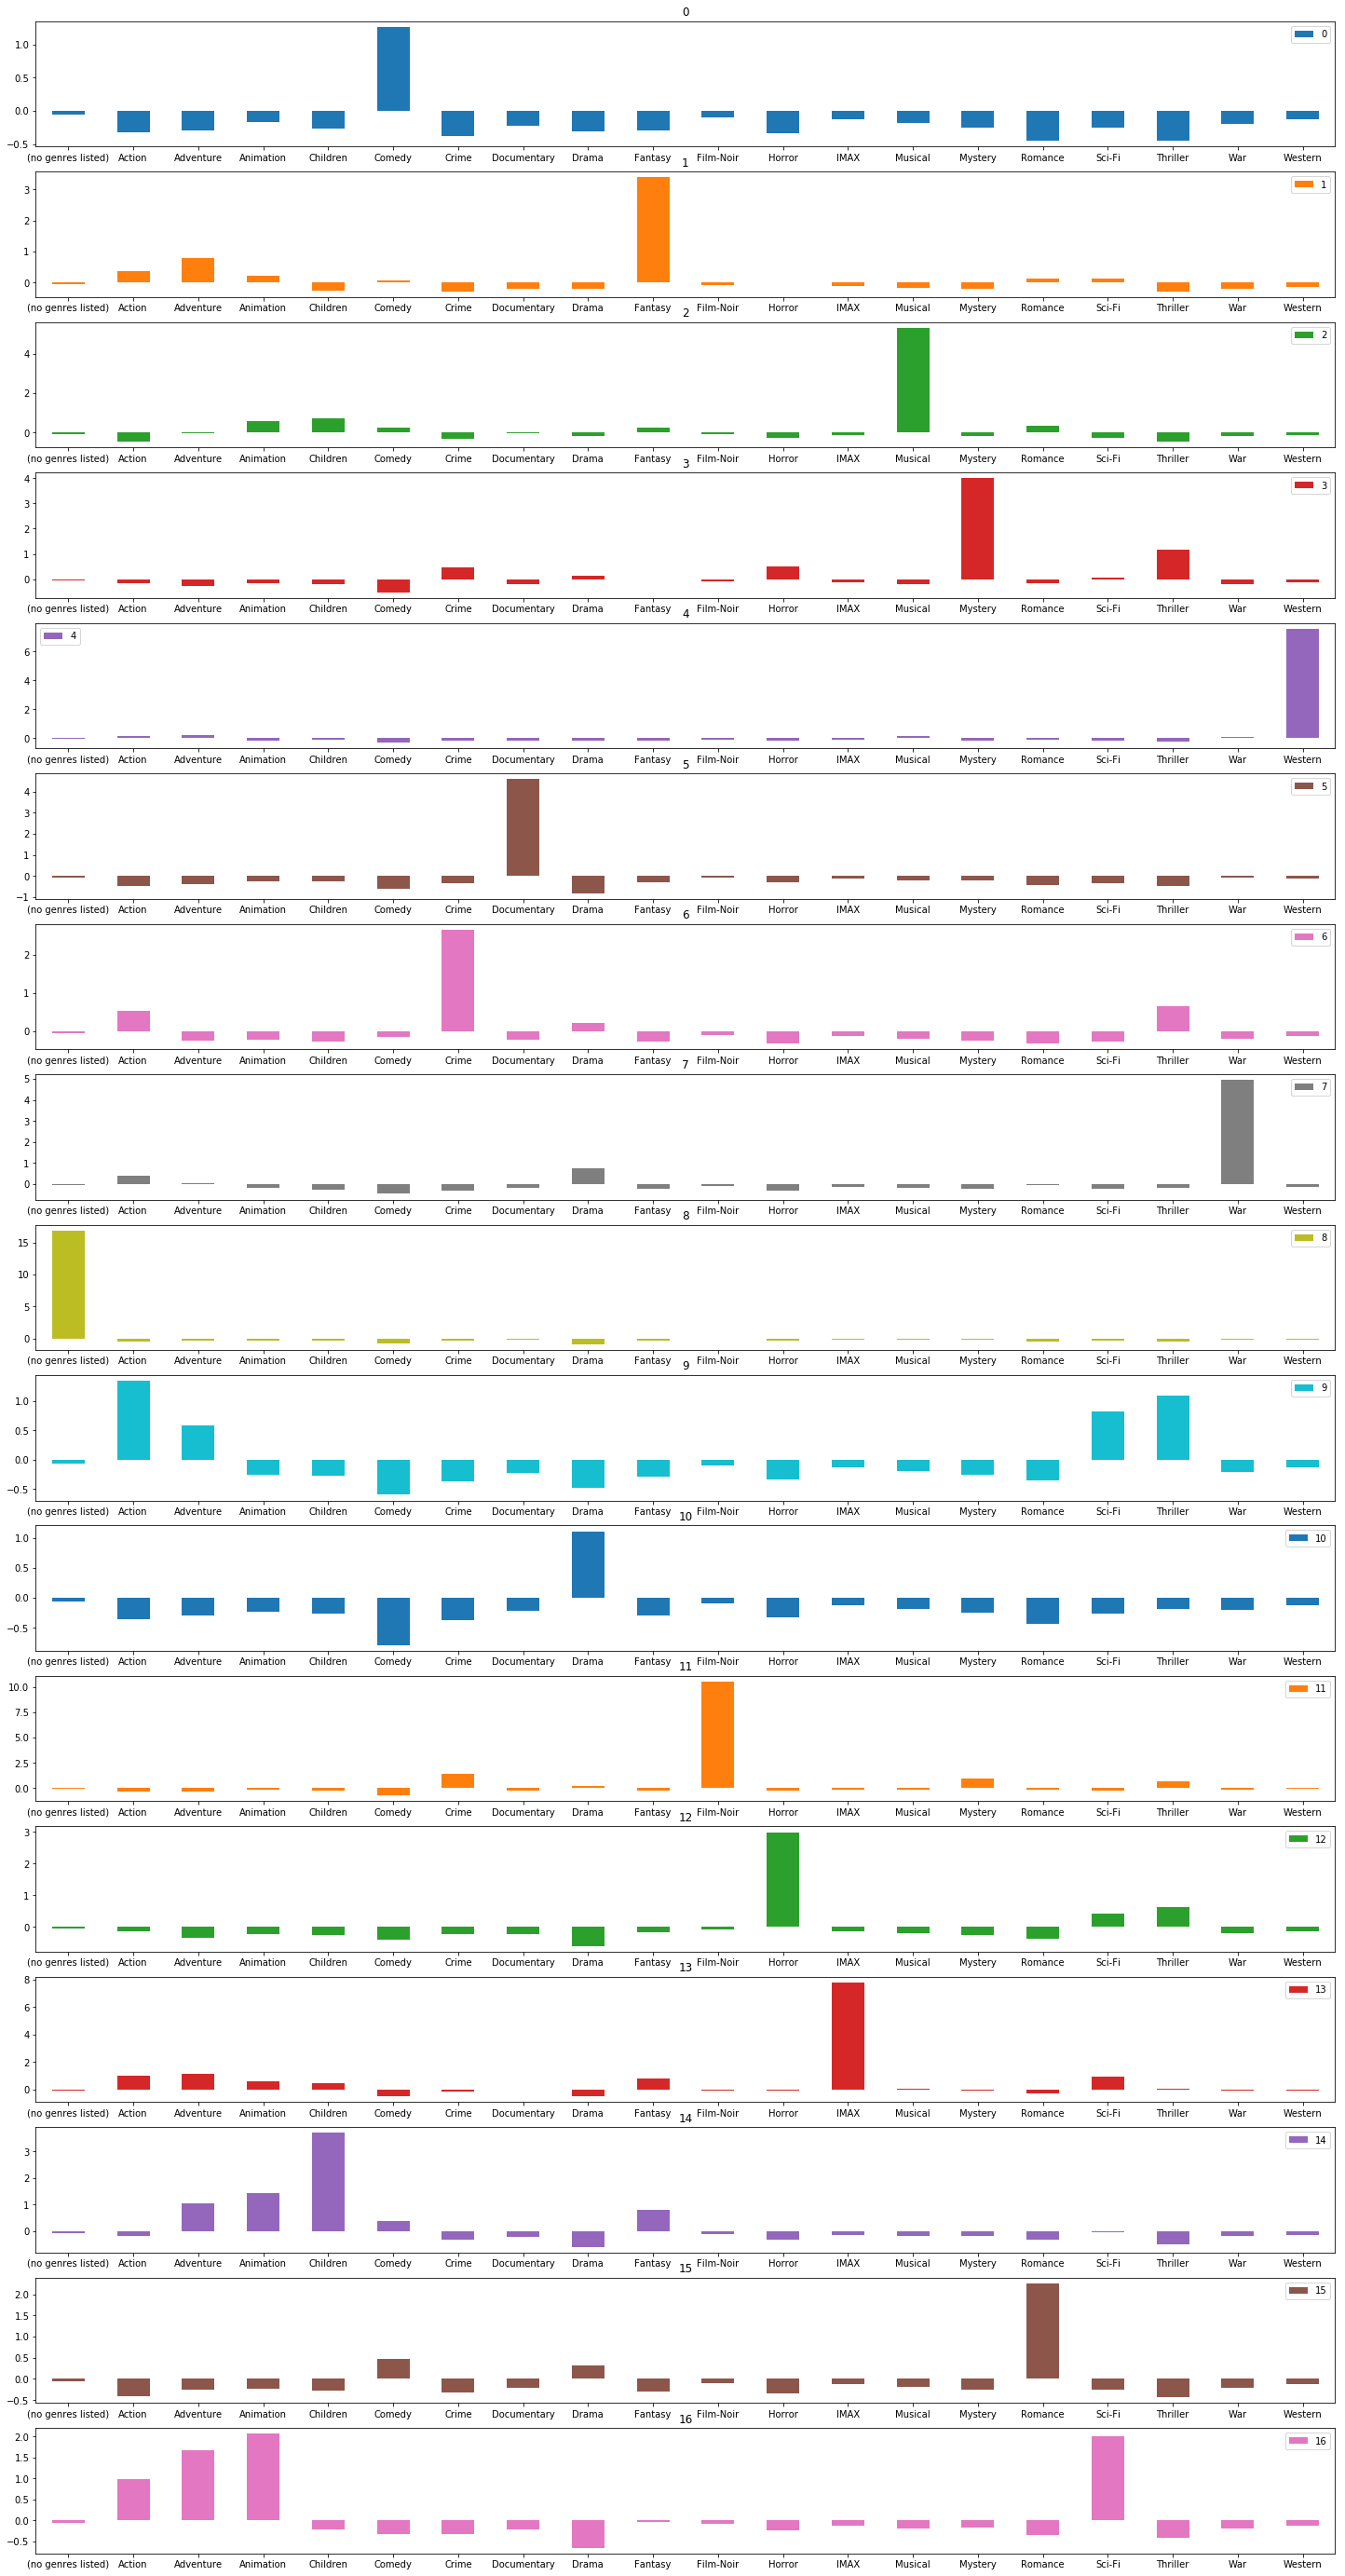

In [24]:
#Plotando esses dados
grupos = pd.DataFrame(modelo.cluster_centers_,columns = generos.columns)
grupos.transpose().plot.bar(subplots = True,figsize = (25,50),sharex = False,rot = 0)
#Se comparar o resultado do filtro sendo igual a dois, e olhar no meu gráfico o grupo 2, vejo que os dados estão relacionados

In [58]:
#Agora, vou realizar o agrupamento hierarquico, para conseguir fazer recomendações do tipo "comédia romântica" ou "ação e aventura"

filmes = pd.read_csv("C:/Users/mathe/OneDrive/Documentos/LABI/Python/Alura/MachineLearning/movies_menor.csv")
filmes.columns = ['filme_id','titulo','generos']

generos = filmes.generos.str.get_dummies()
generos_escalonados = scaler.fit_transform(generos)

scaler = StandardScaler()
generos_escalonados = scaler.fit_transform(generos)

from sklearn.cluster import AgglomerativeClustering
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalonados)

grupos

c:\users\mathe\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\mathe\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\mathe\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\mathe\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([ 6, 14,  5, ..., 16,  6, 14], dtype=int32)

In [47]:
#Reduzindo a dimensionalidade dos dados
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalonados)


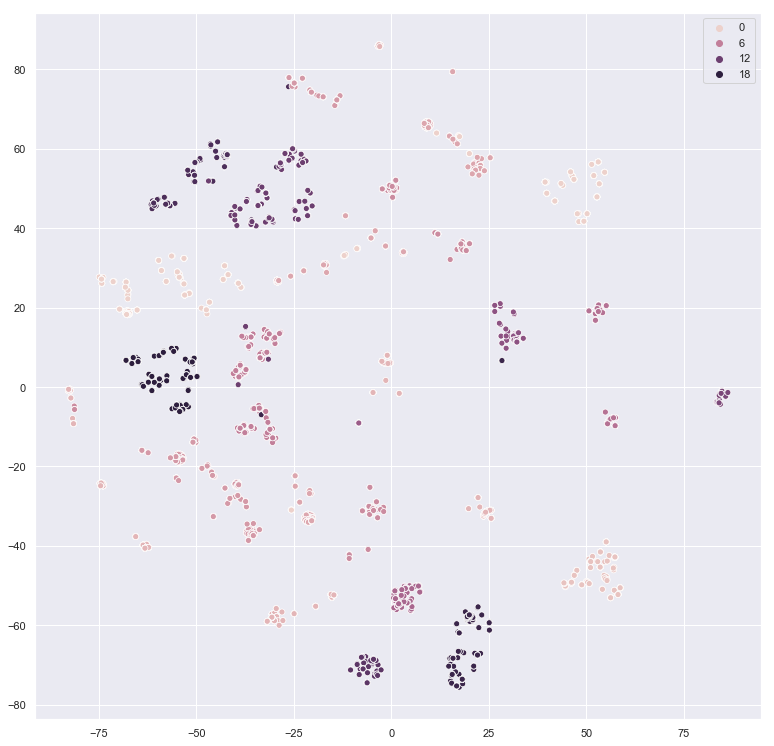

In [48]:
#plotando esses dados
sns.scatterplot(x = visualizacao[:,0], y = visualizacao[:,1],hue = modelo.labels_)

In [57]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalonados)

grupos = pd.DataFrame(modelo.cluster_centers_,columns=generos.columns)
            

#Criando um dendrograma, para ver os agrupamentos de forma hierárquica 
from scipy.cluster.hierarchy import dendrogram, linkage #dendogram para plotar visualmente e linkage para mostrar a distância entre os dados na árvore que será criada
#Fazendo a matriz de distância dos grupos do kmeans
matriz_distancia = linkage(grupos)
matriz_distancia

array([[ 1.        ,  4.        ,  2.18615373,  2.        ],
       [ 8.        , 16.        ,  2.44109069,  2.        ],
       [11.        , 17.        ,  3.13981355,  3.        ],
       [18.        , 19.        ,  3.80802181,  5.        ],
       [15.        , 20.        ,  3.93038713,  6.        ],
       [10.        , 21.        ,  4.02839415,  7.        ],
       [ 0.        , 22.        ,  4.68186277,  8.        ],
       [12.        , 23.        ,  5.31739757,  9.        ],
       [ 2.        , 24.        ,  5.35234613, 10.        ],
       [ 5.        , 25.        ,  5.49003125, 11.        ],
       [ 7.        , 26.        ,  6.02557134, 12.        ],
       [14.        , 27.        ,  6.45413617, 13.        ],
       [13.        , 28.        ,  8.71244203, 14.        ],
       [ 3.        , 29.        ,  8.77157026, 15.        ],
       [ 6.        , 30.        , 12.14715892, 16.        ],
       [ 9.        , 31.        , 26.68663212, 17.        ]])

{'icoord': [[125.0, 125.0, 135.0, 135.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [130.0, 130.0, 152.5, 152.5],
  [115.0, 115.0, 141.25, 141.25],
  [105.0, 105.0, 128.125, 128.125],
  [95.0, 95.0, 116.5625, 116.5625],
  [85.0, 85.0, 105.78125, 105.78125],
  [75.0, 75.0, 95.390625, 95.390625],
  [65.0, 65.0, 85.1953125, 85.1953125],
  [55.0, 55.0, 75.09765625, 75.09765625],
  [45.0, 45.0, 65.048828125, 65.048828125],
  [35.0, 35.0, 55.0244140625, 55.0244140625],
  [25.0, 25.0, 45.01220703125, 45.01220703125],
  [15.0, 15.0, 35.006103515625, 35.006103515625],
  [5.0, 5.0, 25.0030517578125, 25.0030517578125]],
 'dcoord': [[0.0, 2.4410906899772287, 2.4410906899772287, 0.0],
  [0.0, 2.186153733962665, 2.186153733962665, 0.0],
  [0.0, 3.1398135469494313, 3.1398135469494313, 2.186153733962665],
  [2.4410906899772287,
   3.808021809148626,
   3.808021809148626,
   3.1398135469494313],
  [0.0, 3.9303871261808045, 3.9303871261808045, 3.808021809148626],
  [0.0, 4.028394

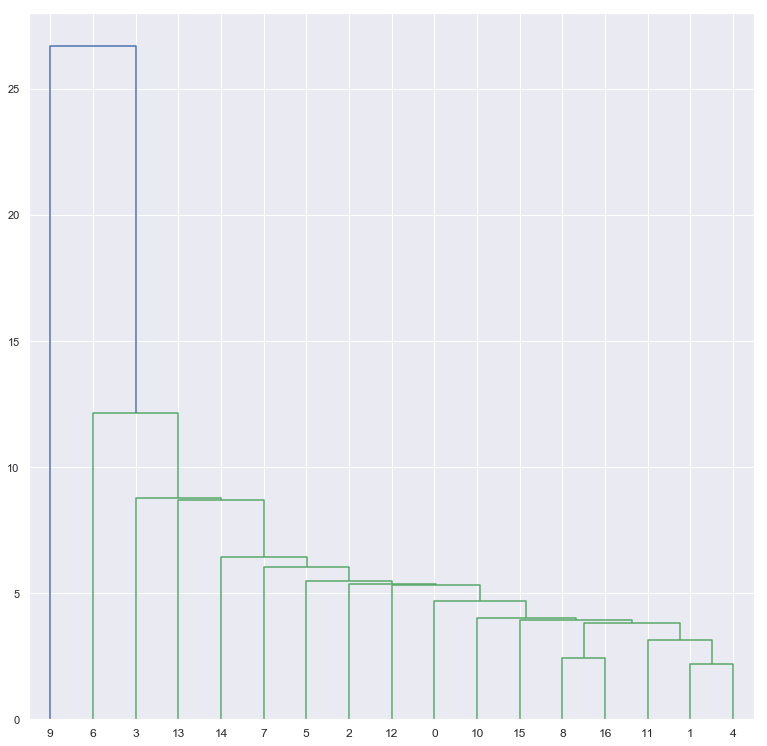

In [59]:
dendrogram(matriz_distancia) #Com isso, conseguimos recomendar filmes com mais de um gênero para a pessoa.
#Por exemplo: Se apessoa assistiu vários filmes de comédia, posso indicar filmes com comédia romântica.